In [126]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import seaborn as sn

In [127]:
class PreprocessData:
    def NomalizeData(Data):
        Data=np.array(Data)
        lenght = len(Data)
        normalizedData = []
        
        for i in range (lenght):
            normalizedData.append(float((Data[i] - min(Data) ) / ( max(Data) - min(Data)) ))
            
        return normalizedData
    
    def TestAndTrain(Data , PercentageOfTrainData):
        PercentageOfTrainData = float(PercentageOfTrainData / 100)
        Train_DataFrame = Data.sample(frac=PercentageOfTrainData)
        Test_DataFrame =Data.drop(Train_DataFrame.index)
        
        return Train_DataFrame , Test_DataFrame
    

In [128]:
Data = pd.read_excel('Detection of COVID-19 Infection from Routine Blood Exams_dataset.xlsx')
Data["SESSO"].replace({'M': 0.,'F': 1.}, inplace=True)

In [129]:
def Suprimun_Tnorm(Relation, data):
    ror = np.vstack((Relation, data))
    sup_norm = np.max(np.min(ror, axis=0))
    return sup_norm


def composition(relation , data):
    composed = np.array(list(map(lambda x: list(map(lambda y: Suprimun_Tnorm(relation[x], data[y]),range(data.shape[0]))),range(relation.shape[0]))))
    return composed


def split_by_class(TrainData):
    Data0 = TrainData[TrainData['TARGET']==0]
    target0 = Data0['TARGET']
    Data0 = Data0.drop('TARGET',axis=1)
    # Data0=(Data0-Data0.min())/(Data0.max()-Data0.min())
    Data1 = TrainData[TrainData['TARGET']==1]
    target1 = Data1['TARGET']
    Data1 = Data1.drop('TARGET',axis=1)
    # Data1=(Data1-Data1.min())/(Data1.max()-Data1.min())
    Data2 = TrainData[TrainData['TARGET']==2]
    target2 = Data2['TARGET']
    Data2 = Data2.drop('TARGET',axis=1)
    # Data2=(Data2-Data2.min())/(Data2.max()-Data2.min())
    return Data0 , Data1, Data2 , target0, target1, target2 



In [130]:
#fill misiing values 
imputer= KNNImputer(n_neighbors=4)
Data = imputer.fit_transform(Data[['SESSO', 'AGE','WBC','Piastrine','Neutrofili','Linfociti','Monociti','Eosinofili','Basofili','PCR','AST','ALT','ALP','GGT','LDH','TARGET']])
Data = pd.DataFrame(Data, columns = ['SESSO', 'AGE','WBC','Piastrine','Neutrofili','Linfociti','Monociti','Eosinofili','Basofili','PCR','AST','ALT','ALP','GGT','LDH','TARGET'])
# Data = pd.concat([Data1, Data2,Data0])






In [131]:
#split to teset and train 
# Dataset1 = PreprocessData.NomalizeData(Data)
Dataset = PreprocessData.TestAndTrain(Data , 80)

TrainData = Dataset[0]
TestData = Dataset[1]
targetTest = TestData['TARGET']
TestData = TestData.drop('TARGET',axis=1)
# TestData=(TestData-TestData.min())/(TestData.max()-TestData.min())

In [132]:
Data0 , Data1, Data2 , target0, target1, target2  = split_by_class(TrainData)
    

In [133]:
min0 = Data0.min(axis=0)
max0 = Data0.max(axis=0)
min1 = Data1.min(axis=0)
max1 = Data1.max(axis=0)
min2 = Data2.min(axis=0)
max2 = Data2.max(axis=0)

In [134]:
# method 1 create similarity matrix based on numeric range 
avg0 = (min0 + max0 )/2
avg0['SESSO']=0
avg1 = (min1 + max1 )/2
avg1['SESSO']=0
avg2 = (min2 + max2 )/2
avg1['SESSO']=0
avg0 = np.array(avg0)
avg1 = np.array(avg1)
avg2 = np.array(avg2)


#method 2 , create similarity matrix based on mean of the class 
# avg0 = Data0.mean()
# avg0['SESSO']=0
# avg1 = Data1.mean()
# avg1['SESSO']=0
# avg2 = Data2.mean()
# avg1['SESSO']=0
# avg0 = np.array(avg0)
# avg1 = np.array(avg1)
# avg2 = np.array(avg2)


In [153]:
avg0

array([0.0000e+00, 5.6500e+01, 1.4200e+01, 2.5200e+02, 1.3450e+01,
       2.1500e+00, 1.6000e+00, 2.5000e-01, 5.0000e-02, 1.8315e+02,
       2.1200e+02, 1.7200e+02, 1.0575e+02, 2.8550e+02, 3.7500e+02])

In [136]:
avg1

array([0.0000e+00, 4.5500e+01, 9.3500e+00, 2.3850e+02, 6.9125e+00,
       3.7500e+00, 7.0000e-01, 1.5000e-01, 1.2500e-02, 2.0550e+02,
       1.5400e+02, 9.3000e+01, 2.6100e+02, 3.5200e+02, 5.3300e+02])

In [137]:
avg2

array([5.00000e-01, 5.25000e+01, 1.61000e+01, 3.55500e+02, 1.04500e+01,
       1.45000e+00, 8.50000e-01, 2.50000e-01, 5.00000e-02, 2.40150e+02,
       2.83000e+02, 1.42500e+02, 2.05500e+02, 2.92375e+02, 6.56000e+02])

In [138]:
RelationMatrix =[ avg0,avg1,avg2]

In [139]:
RelationMatrix = np.array(RelationMatrix)

In [140]:
RelationMatrix.shape

(3, 15)

In [141]:
RelationMatrix

array([[0.00000e+00, 5.65000e+01, 1.42000e+01, 2.52000e+02, 1.34500e+01,
        2.15000e+00, 1.60000e+00, 2.50000e-01, 5.00000e-02, 1.83150e+02,
        2.12000e+02, 1.72000e+02, 1.05750e+02, 2.85500e+02, 3.75000e+02],
       [0.00000e+00, 4.55000e+01, 9.35000e+00, 2.38500e+02, 6.91250e+00,
        3.75000e+00, 7.00000e-01, 1.50000e-01, 1.25000e-02, 2.05500e+02,
        1.54000e+02, 9.30000e+01, 2.61000e+02, 3.52000e+02, 5.33000e+02],
       [5.00000e-01, 5.25000e+01, 1.61000e+01, 3.55500e+02, 1.04500e+01,
        1.45000e+00, 8.50000e-01, 2.50000e-01, 5.00000e-02, 2.40150e+02,
        2.83000e+02, 1.42500e+02, 2.05500e+02, 2.92375e+02, 6.56000e+02]])

In [161]:
TestData = np.array(TestData)
SimilarityMatrix = composition(RelationMatrix , TestData)
SimilarityMatrix.T

array([[257.  , 257.  , 257.  ],
       [375.  , 391.  , 391.  ],
       [375.  , 453.  , 453.  ],
       [375.  , 407.  , 407.  ],
       [375.  , 442.5 , 442.5 ],
       [344.75, 344.75, 344.75],
       [375.  , 533.  , 551.25],
       [375.  , 533.  , 655.  ],
       [245.  , 245.  , 245.  ],
       [375.  , 533.  , 542.25],
       [317.25, 317.25, 355.5 ],
       [375.  , 518.  , 518.  ],
       [375.  , 533.  , 646.  ],
       [375.  , 533.  , 565.  ],
       [274.  , 274.  , 274.  ],
       [375.  , 533.  , 606.  ],
       [375.  , 533.  , 539.  ],
       [375.  , 475.  , 475.  ],
       [207.  , 207.  , 207.  ],
       [375.  , 533.  , 605.  ],
       [186.  , 186.  , 186.  ],
       [375.  , 533.  , 558.  ],
       [375.  , 428.  , 428.  ],
       [375.  , 533.  , 540.  ],
       [375.  , 439.  , 439.  ],
       [375.  , 416.  , 416.  ],
       [358.  , 358.  , 358.  ],
       [375.  , 456.  , 456.  ],
       [198.  , 198.  , 198.  ],
       [320.  , 320.  , 320.  ],
       [36

In [143]:

predict = []
for i in range(SimilarityMatrix.shape[1]):
    a = np.argmax(SimilarityMatrix[:,i])
    predict.append(a)

In [144]:
atcutal= np.array(targetTest)
predict = np.array(predict)

In [145]:
conf3 = confusion_matrix(atcutal, predict )

In [146]:
accuracy_score(atcutal, predict)

0.48214285714285715

In [147]:
#change 3 class to two class , class 0 and class 1
actual1 =np.zeros(len(predict))
pred1 =np.zeros(len(predict))
for i in range(len(predict)):
    if(predict[i] == 2 ):
        pred1[i]=1
    else:
        pred1[i]=predict[i]
    if(atcutal[i]==2):
        actual1[i]=1
    else:
        actual1[i] = atcutal[i]

In [148]:
accuracy_score(actual1, pred1)

0.6428571428571429

In [149]:
conf2 = confusion_matrix(actual1, pred1 )

<AxesSubplot:>

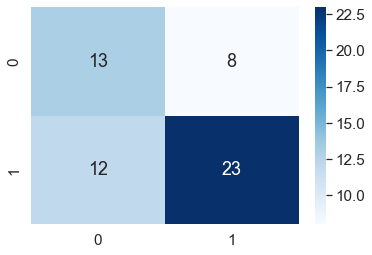

In [150]:

df_cm = pd.DataFrame(conf2, range(2), range(2))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size":18} , cmap='Blues')

<AxesSubplot:>

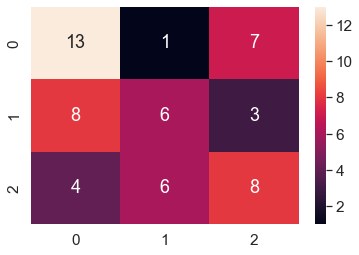

In [151]:
df_cm = pd.DataFrame(conf3, range(3), range(3))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size":18}) # font size